In [2]:
import pandas as pd
import numpy as np
import scipy.io
import statsmodels.api as sm

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [43]:
df = pd.read_csv("./output/ek-us-cross-section-quality60-ge.csv")

dffixR = pd.read_csv("./output/ek-us-cross-section-quality60-fixR.csv")

In [44]:
df.head()

,income,assets,homeshare,expenditure,mpc,θ,∂W
0,0.703120,0.015152,0.851767,0.768959,0.201071,-5.264649,1.012219
1,0.445225,0.015152,0.879467,0.703201,0.229315,-5.579277,1.013587
2,0.703120,-0.156566,0.869580,0.725623,0.227220,-5.454858,1.013114
3,0.445225,-0.242424,0.915164,0.616990,0.314593,-6.059930,1.015352
4,0.445225,-0.414141,0.956246,0.526943,0.976216,-7.186873,1.016639


In [45]:
df["∂W"].mean()

1.0116139097413301

In [46]:
df["∂W"].mean()

1.0116139097413301

In [56]:
foo = pd.qcut(df.expenditure, 5,labels = False)

df["quantile-cut" ] = foo

dffixR["quantile-cut" ] = foo 


In [48]:
grp = df.groupby("quantile-cut")

In [49]:
grp["∂W"].mean()

quantile-cut
0    1.025944
1    1.011611
2    1.008768
3    1.006541
4    1.004178
Name: ∂W, dtype: float64

In [50]:
round(grp.assets.mean(),2)

quantile-cut
0   -0.45
1   -0.32
2   -0.25
3    0.07
4    1.00
Name: assets, dtype: float64

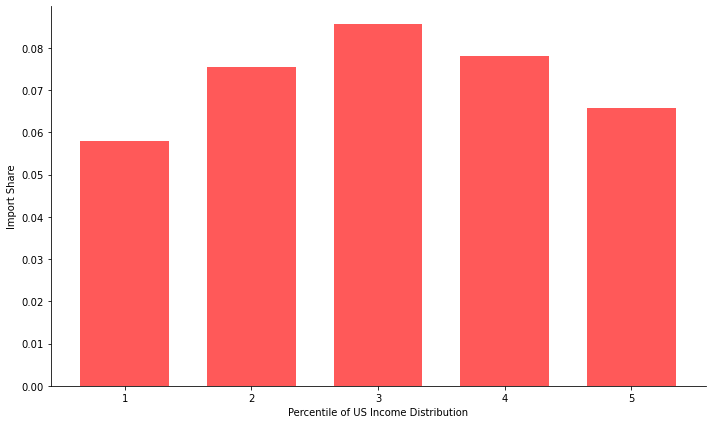

In [51]:
fig, ax = plt.subplots(figsize = [10.0,6.0], tight_layout = True)

hsr = ax.bar(grp.homeshare.median().index + 1, 
       1 - grp.homeshare.mean(), alpha = 0.65, width = 0.70, color = "red")

# ax.bar_label(hsr, round(1 - grp.homeshare.median(),2),
#                   padding=5, color='black', fontweight='bold')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel("Percentile of US Income Distribution")
ax.set_ylabel("Import Share")

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

plt.show()

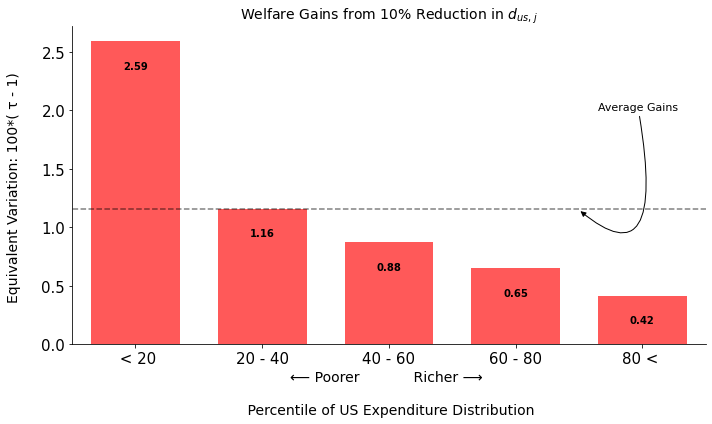

In [55]:
fig, ax = plt.subplots(figsize = [10.0,6.0], tight_layout = True)

hsr = ax.bar(grp.homeshare.median().index + 1, 
       100*(grp["∂W"].mean()-1), alpha = 0.65, width = 0.70, color = "red")

ax.bar_label(hsr, round(100*(grp["∂W"].mean()-1),2),
                  padding=-30, color='black', fontweight='bold')

ax.plot(range(0,7), round(100*(df["∂W"].mean()-1),2)*np.ones(7), alpha = 0.50, linestyle = "--", c = "black")

ax.set_xlim(.5,5.5)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('Welfare Gains from 10% Reduction in $d_{us,j}$', fontsize=14)

ax.set_xlabel("⟵ Poorer            Richer ⟶ \n \n Percentile of US Expenditure Distribution", fontsize=14)
ax.set_ylabel("Equivalent Variation: 100*( τ - 1) \n", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=15)

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

ax.xaxis.set_ticklabels([" < 20", "20 - 40", "40 - 60", "60 - 80", "80 < "])

ax.annotate(
    "Average Gains", 
    xy=(4.5, 1.15), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(4.65, 2), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=280,angleB=-40",
        "color": "black"
    },
    fontsize=11,
)

# plt.savefig("../notes/figures/ge-welfare-household.pdf", bbox_inches = "tight")

plt.show()

Text(4.65, 2, 'Average Gains, GE')

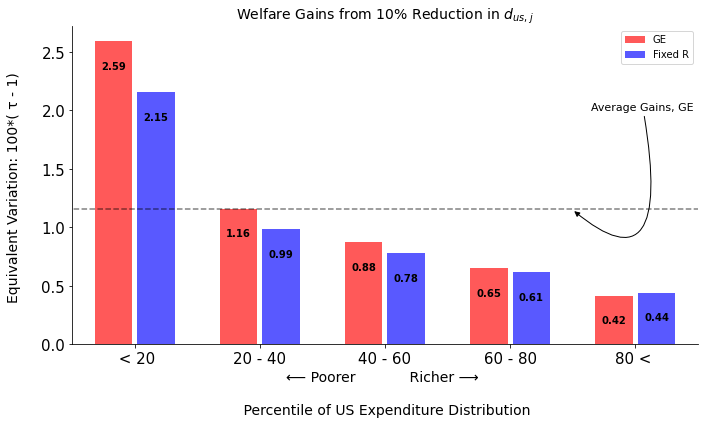

In [89]:
grpR = dffixR.groupby("quantile-cut")

fig, ax = plt.subplots(figsize = [10.0,6.0], tight_layout = True)

offset = .17

hsr = ax.bar(grp.homeshare.median().index + 1 - offset, 
       100*(grp["∂W"].mean()-1), alpha = 0.65, width = 0.30, color = "red", label = "GE")

hsrR = ax.bar(grp.homeshare.median().index + 1 + offset, 
       100*(grpR["∂W"].mean()-1), alpha = 0.65, width = 0.30, color = "blue", label = "Fixed R")

ax.bar_label(hsr, round(100*(grp["∂W"].mean()-1),2),
                  padding=-30, color='black', fontweight='bold')

ax.bar_label(hsrR, round(100*(grpR["∂W"].mean()-1),2),
                  padding=-30, color='black', fontweight='bold')

ax.plot(range(0,7), round(100*(df["∂W"].mean()-1),2)*np.ones(7), alpha = 0.50, linestyle = "--", c = "black")



ax.set_xlim(.5,5.5)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('Welfare Gains from 10% Reduction in $d_{us,j}$', fontsize=14)

ax.set_xlabel("⟵ Poorer            Richer ⟶ \n \n Percentile of US Expenditure Distribution", fontsize=14)
ax.set_ylabel("Equivalent Variation: 100*( τ - 1) \n", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=15)

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

ax.xaxis.set_ticklabels([" < 20", "20 - 40", "40 - 60", "60 - 80", "80 < "])

ax.legend(loc='upper right')

ax.annotate(
    "Average Gains, GE", 
    xy=(4.5, 1.15), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(4.65, 2), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=280,angleB=-40",
        "color": "black"
    },
    fontsize=11,
)


In [14]:
poor = df.expenditure < df.expenditure.quantile(0.25)

rich = df.expenditure > df.expenditure.quantile(0.75)

In [15]:
print("Rich Home Share: ", round(1 - df.homeshare[rich].median(), 3))

print("Poor Home Share: ", round(1 - df.homeshare[poor].median(), 3))

print("Rich Elasticity: ", round(df.x2[rich].median(), 3))

print("Poor Elasticity: ", round(df.x2[poor].median(), 3))

Rich Home Share:  0.076
Poor Home Share:  0.038
Rich Elasticity:  -6.214
Poor Elasticity:  -13.069


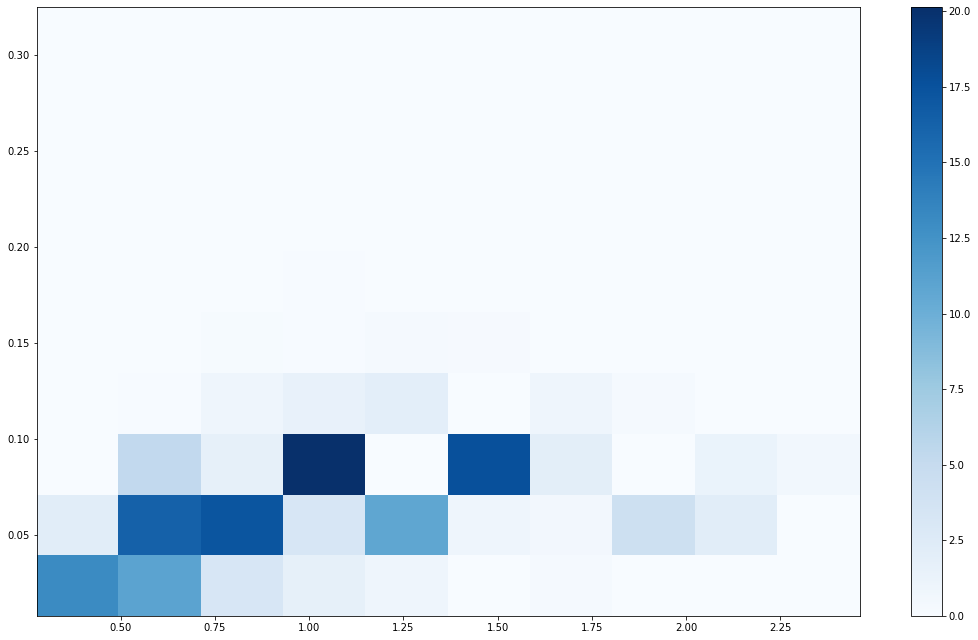

In [7]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

h = ax.hist2d(df.expenditure, (1 - df.homeshare), bins=10, cmap='Blues', density = True)

fig.colorbar(h[3], ax=ax)

# ax.set_ylim(0.045,0.20)
# ax.set_xlim(0.35,2.0)

plt.show()

In [16]:
#define response variable
y = (1 - df.homeshare)

#define predictor variables
x = df.expenditure

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              homeshare   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1774.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:57:52   Log-Likelihood:             2.3031e+05
No. Observations:              100000   AIC:                        -4.606e+05
Df Residuals:                   99998   BIC:                        -4.606e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0449      0.000    236.251      

C:\Users\irmew01\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


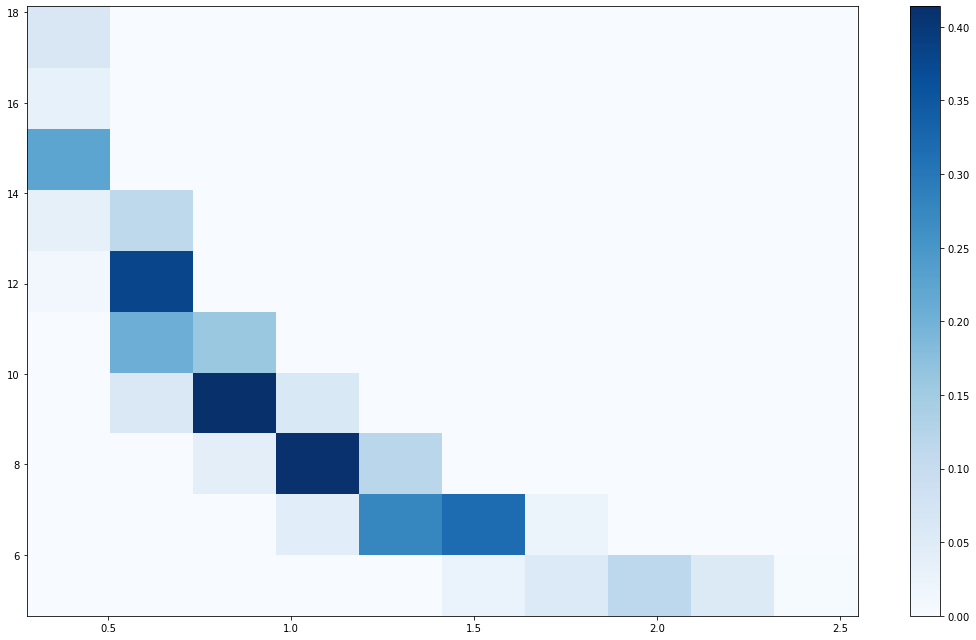

In [17]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

h = ax.hist2d(df.expenditure, (- df.x2), bins=10, cmap='Blues', density = True)

fig.colorbar(h[3], ax=ax)

plt.show()